In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

In [2]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
bus_stops.head()

stop                     route  \
0  GREEN LN & WHITES CREEK PIKE WB             GOLDEN VALLEY   
1    _ 9TH AVE S & EDGEHILL AVE SB          8TH AVENUE SOUTH   
2   DONELSON/DELL STATION OUTBOUND         MURFREESBORO PIKE   
3       17TH AVE S & DOROTHY PL SB                   BELMONT   
4         COCKRILL ST & 14TH AVE N  ST. CECILIA - CUMBERLAND   

                  location        lat        lng  
0  (36.236249, -86.816722)  36.236249 -86.816722  
1  (36.142642, -86.780897)  36.142642 -86.780897  
2  (36.105615, -86.672004)  36.105615 -86.672004  
3  (36.137623, -86.795609)  36.137623 -86.795609  
4  (36.175944, -86.804242)  36.175944 -86.804242

In [3]:
school_districts_geo = gpd.read_file('../data/school_districts.geojson')
print(school_districts_geo)
school_districts_geo.head()

   first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   
1        Jill    Madison  37115          jill.speering@mnps.org    TN   
2  Dr. Jo Ann  Nashville  37220          joann.brannon@mnps.org    TN   
3        Anna  Hermitage  37076          anna.shepherd@mnps.org    TN   
4         Amy  Nashville  37221             amy.frogge@mnps.org    TN   
5        Mary  Nashville  37215       mary@pierceforschools.org    TN   
6   Christine  Nashville  37203                 cbuggs@mnps.org    TN   
7       Tyese    Antioch  37013           tyese.hunter@mnps.org    TN   
8        Will  Nashville  37204     will@pinkstonforschools.com    TN   

  last_name                address    position term_expir district  \
0    Gentry        6108 Beals Lane      Member       2016        1   
1  Speering      1033 Falls Avenue  Vice-Chair       2016        3   
2   Brannon  5444 San Marcos Drive      Member       2018  

first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   
1        Jill    Madison  37115          jill.speering@mnps.org    TN   
2  Dr. Jo Ann  Nashville  37220          joann.brannon@mnps.org    TN   
3        Anna  Hermitage  37076          anna.shepherd@mnps.org    TN   
4         Amy  Nashville  37221             amy.frogge@mnps.org    TN   

  last_name                address    position term_expir district  \
0    Gentry        6108 Beals Lane      Member       2016        1   
1  Speering      1033 Falls Avenue  Vice-Chair       2016        3   
2   Brannon  5444 San Marcos Drive      Member       2018        2   
3  Shepherd     4545 Raccoon Trail       Chair       2018        4   
4    Frogge  7237 Riverfront Drive      Member       2016        9   

          phone                                           geometry  
0  615-268-5269  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...  
1  615-562-5234  MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ...  
2  615-833-5976  MULTIPOLYGON (((-86.76696 36.08333, -86.7659 3...  
3  615-210-3768  MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ...  
4  615-521-5650  MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ...

In [4]:
zipcodes_geo = gpd.read_file('../data/zipcodes.geojson')
zipcodes_geo.head()

zip objectid    po_name      shape_stlength        shape_starea  \
0  37115        1    MADISON  178783.02488886821  596553400.57885742   
1  37216        3  NASHVILLE  75820.997821400058  188884682.28344727   
2  37204        9  NASHVILLE  93180.292250425613  200664795.51708984   
3  37027       11  BRENTWOOD   159760.6942933173  174978422.04101562   
4  37064       18   FRANKLIN  28995.828320601937  46969608.005737305   

                                            geometry  
0  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...  
1  MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...  
2  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...  
3  MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...  
4  MULTIPOLYGON (((-87.02197 36.012, -87.0214 36....

In [5]:
print(school_districts_geo.crs)

EPSG:4326


In [7]:
bus_geo = gpd.GeoDataFrame(bus_stops,
                           crs = school_districts_geo.crs,
                           geometry = gpd.points_from_xy(bus_stops.lng, bus_stops.lat))

In [8]:
type(bus_geo)

geopandas.geodataframe.GeoDataFrame

In [9]:
school_districts = [['district', 'city', 'geometry']]

In [10]:
stops_by_school_districts = gpd.sjoin(bus_geo, school_districts_geo, predicate = 'within')

In [11]:
stops_by_school_districts.head()

stop                     route  \
0  GREEN LN & WHITES CREEK PIKE WB             GOLDEN VALLEY   
1    _ 9TH AVE S & EDGEHILL AVE SB          8TH AVENUE SOUTH   
2   DONELSON/DELL STATION OUTBOUND         MURFREESBORO PIKE   
3       17TH AVE S & DOROTHY PL SB                   BELMONT   
4         COCKRILL ST & 14TH AVE N  ST. CECILIA - CUMBERLAND   

                  location        lat        lng                    geometry  \
0  (36.236249, -86.816722)  36.236249 -86.816722  POINT (-86.81672 36.23625)   
1  (36.142642, -86.780897)  36.142642 -86.780897   POINT (-86.7809 36.14264)   
2  (36.105615, -86.672004)  36.105615 -86.672004    POINT (-86.672 36.10562)   
3  (36.137623, -86.795609)  36.137623 -86.795609  POINT (-86.79561 36.13762)   
4  (36.175944, -86.804242)  36.175944 -86.804242  POINT (-86.80424 36.17594)   

   index_right  first_name       city    zip                           email  \
0            0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net   
1            6   Christine  Nashville  37203                 cbuggs@mnps.org   
2            8        Will  Nashville  37204     will@pinkstonforschools.com   
3            5        Mary  Nashville  37215       mary@pierceforschools.org   
4            0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net   

  state last_name                address position term_expir district  \
0    TN    Gentry        6108 Beals Lane   Member       2016        1   
1    TN     Buggs        425 Fisk Street   Member       2016        5   
2    TN  Pinkston  937 Battlefield Drive   Member       2016        7   
3    TN    Pierce      4329 Wallace Lane   Member       2018        8   
4    TN    Gentry        6108 Beals Lane   Member       2016        1   

          phone  
0  615-268-5269  
1  615-525-5371  
2  615-298-5787  
3  615-310-9772  
4  615-268-5269

In [12]:
stops_by_school_districts['district'].value_counts()

district
5    801
1    424
8    238
7    237
3    201
4    198
9    147
6    129
2    110
Name: count, dtype: int64

In [13]:
district_polygon = school_districts_geo.loc[school_districts_geo['district'].isin(['1', '2', '3', '4', '5', '6', '7','8','9'])]

In [14]:
stops_in_all = stops_by_school_districts.loc[stops_by_school_districts['district'].isin(['1', '2', '3', '4', '5', '6', '7','8','9'])]

In [15]:
# polygon = school_districts_geo.loc[school_districts_geo['district'] == '5']

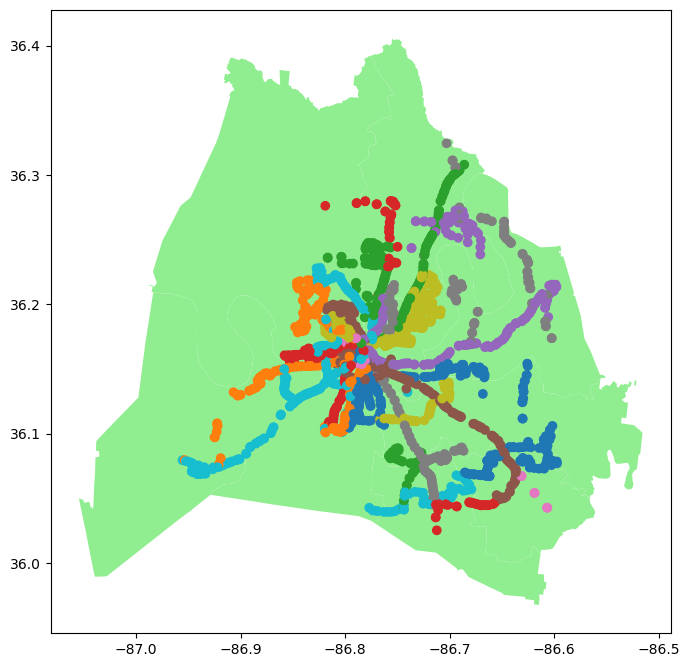

In [16]:
ax = district_polygon.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_all.plot( ax = ax, column = 'route');
plt.show();

In [17]:
district_polygon.geometry.centroid

C:\Users\user\AppData\Local\Temp\ipykernel_7800\1284733702.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_polygon.geometry.centroid


0    POINT (-86.86087 36.26282)
1    POINT (-86.72361 36.28516)
2    POINT (-86.70156 36.03021)
3    POINT (-86.63964 36.19697)
4    POINT (-86.95428 36.10392)
5    POINT (-86.82739 36.08342)
6    POINT (-86.75215 36.16995)
7    POINT (-86.63366 36.04946)
8     POINT (-86.64296 36.1081)
dtype: geometry

In [18]:
center = district_polygon.geometry.centroid[6]
print(center)

POINT (-86.75214735715096 36.16995457037151)


C:\Users\user\AppData\Local\Temp\ipykernel_7800\1237782143.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = district_polygon.geometry.centroid[6]


In [19]:
area_center = [center.y, center.x]
print(area_center)

[36.16995457037151, -86.75214735715096]


In [21]:
i = 0
for row_index, row_values in stops_in_all.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
stop           GREEN LN & WHITES CREEK PIKE WB
route                            GOLDEN VALLEY
location               (36.236249, -86.816722)
lat                                  36.236249
lng                                 -86.816722
geometry          POINT (-86.816722 36.236249)
index_right                                  0
first_name                          Dr. Sharon
city                                 Nashville
zip                                      37218
email           gentryfordistrict1@comcast.net
state                                       TN
last_name                               Gentry
address                        6108 Beals Lane
position                                Member
term_expir                                2016
district                                     1
phone                             615-268-5269
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
stop           _ 9TH AVE S & EDGEHILL AVE SB
route    

In [22]:
map_all = folium.Map(location =  area_center, zoom_start = 10)

folium.GeoJson(district_polygon).add_to(map_all)

for row_index, row_values in stops_in_all.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_all)
map_all.save('../maps/map37207.html')


map_all

In [26]:
cluster_map_all = folium.Map(location =  area_center, zoom_start = 10)

marker_cluster = MarkerCluster().add_to(cluster_map_all)

district_key = "district"  

palette = [
    "#e41a1c",  # red
    "#377eb8",  # blue
    "#4daf4a",  # green
    "#984ea3",  # purple
    "#ff7f00",  # orange
    "#ffff33",  # bright yellow
    "#a65628",  # brown
    "#f781bf",  # pink
    "#00ced1"   # turquoise
]

district_ids = sorted(pd.unique(district_polygon[district_key]))

color_map = {d: palette[i % len(palette)] 
for i, d in enumerate(district_ids)}

folium.GeoJson(
    data=district_polygon,  
    style_function=lambda feature: {
        "fillColor": color_map.get(feature["properties"][district_key], "#cccccc"),
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.5,
    },
    name="Districts"
).add_to(cluster_map_all)

for row_index, row_values in stops_in_all.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

cluster_map_all.save('../maps/clusterall.html')

cluster_map_all 